In [1]:
# general imports
import warnings
import numpy as np
from scipy.stats import spearmanr, pearsonr, ttest_ind, wilcoxon


# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# programming stuff
import time
import os
import pickle
from pathlib import Path

# import the SC_preprocessing code
import sys
sys.path.insert(1, '../../')
sys.path.insert(1, '../')
from sc_preprocessing import sc_preprocess
from method_comparison import validation_plotting as vp


In [2]:
## parameters
aug_data_path = f"{os.getcwd()}/../data/single_cell_data/augmented_kang_data/"
res_data_path = f"{os.getcwd()}/../results/single_cell_data/buddiM2_kang/"
cibersort_genes_path = f"{os.getcwd()}/../results/single_cell_data/cibersort_kang/CIBERSORTx_Job17_kang_1_cybersort_sig_inferred_phenoclasses.CIBERSORTx_Job17_kang_1_cybersort_sig_inferred_refsample.bm.K999.txt"

# cibersort results
cibersort_file_path = f"{os.getcwd()}/../results/single_cell_data/cibersort_kang/CIBERSORTx_Job18_Results.csv"

# bp results
bp_res_path = f"{os.getcwd()}/../results/single_cell_data/bp_kang/"

# DiffExp results
de_res_path = f"{os.getcwd()}/../data/single_cell_data/kang_rybakov/kang_DE_paper.tsv"

num_genes = 7000


In [9]:
exp_type = "mono-kang"

buddi_file = os.path.join(res_data_path, f"{exp_type}_pearson_matr.csv")
pca_file = os.path.join(res_data_path, f"{exp_type}_pearson_PCA.csv")
cvae_file = os.path.join(res_data_path, f"{exp_type}_pearson_CVAE.csv")
vae_file = os.path.join(res_data_path, f"{exp_type}_pearson_VAE.csv")

buddi_df = pd.read_csv(buddi_file, sep=",")
pca_df = pd.read_csv(pca_file, sep=",")
cvae_df = pd.read_csv(cvae_file, sep=",")
vae_df = pd.read_csv(vae_file, sep=",")


# format the corr
buddi_df["method"] = ["1_BuDDI"]*buddi_df.shape[0]
pca_df["method"] = ["3_PCA"]*pca_df.shape[0]
cvae_df["method"] = ["2_CVAE"]*cvae_df.shape[0]
vae_df["method"] = ["4_VAE"]*vae_df.shape[0]

plot_df = pd.concat([buddi_df, pca_df, cvae_df, vae_df])




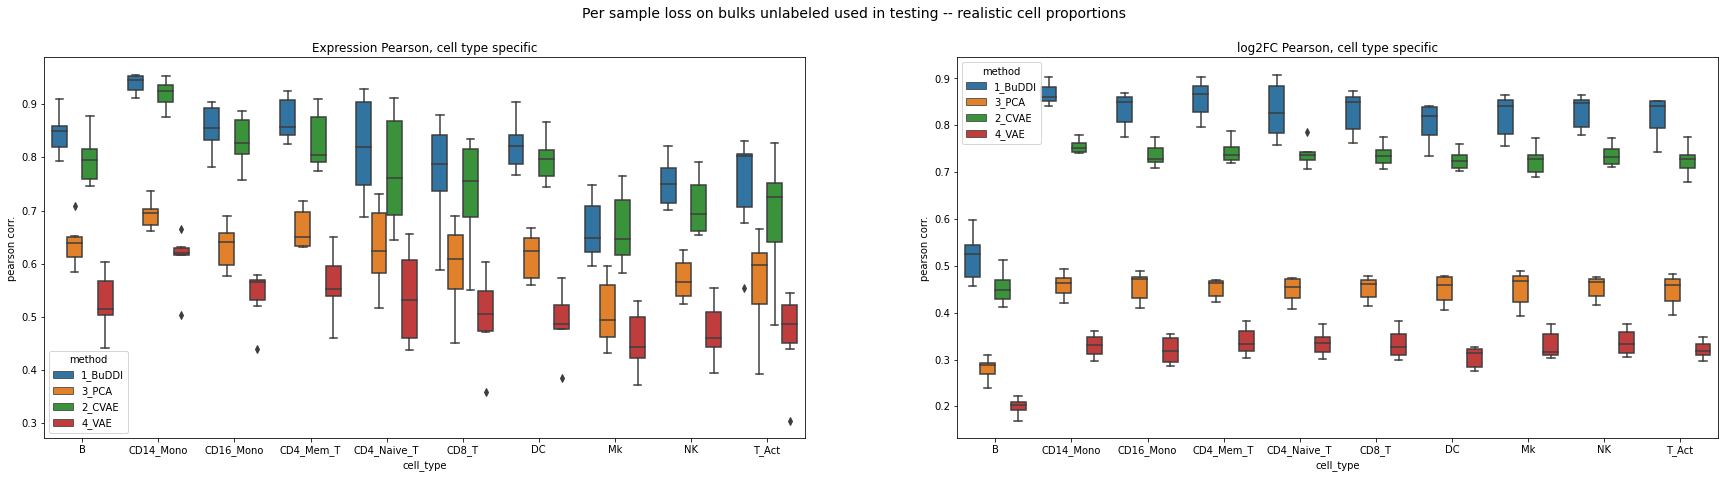

In [10]:

# plot
fig, axs = plt.subplots(1, 2, figsize=(30,7))

sns.boxplot(data=plot_df[plot_df["bulk_type"] == "cell_type_specific"], 
            x="cell_type", y="expr_r2",
            hue="method", ax= axs[0])
axs[0].set_title("Expression Pearson, cell type specific")
axs[0].set(ylabel="pearson corr.")


sns.boxplot(data=plot_df[plot_df["bulk_type"] == "cell_type_specific"], 
            x="cell_type", y="log2FC_r2",
            hue="method", ax= axs[1])
axs[1].set_title("log2FC Pearson, cell type specific")
axs[1].set(ylabel="pearson corr.")




fig.suptitle("Per sample loss on bulks unlabeled used in testing -- realistic cell proportions", fontsize=14)

fig.show()